## **DATA260P Project 1: Comparing Sorting Algorithms**

##### Connor McManigal and Peyton Politewicz

## **Experimental Time Analysis**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

tr_df = pd.read_csv('uniform_results.csv')
as_df = pd.read_csv('almost_sorted_results.csv')

### MergeSort Time Analysis

In [71]:
merge_tr_1000 = tr_df[(tr_df['Algorithm'] == 'MergeSort') & (tr_df['Data Size'] == 1000)]
merge_tr_2000 = tr_df[(tr_df['Algorithm'] == 'MergeSort') & (tr_df['Data Size'] == 2000)]
merge_tr_4000 = tr_df[(tr_df['Algorithm'] == 'MergeSort') & (tr_df['Data Size'] == 4000)]
merge_tr_8000 = tr_df[(tr_df['Algorithm'] == 'MergeSort') & (tr_df['Data Size'] == 8000)]
merge_tr_16000 = tr_df[(tr_df['Algorithm'] == 'MergeSort') & (tr_df['Data Size'] == 16000)]

#merge_as_1000 = as_df[(as_df['Algorithm'] == 'MergeSort') & (as_df['Data Size'] == 1000)]
#merge_as_2000 = as_df[(as_df['Algorithm'] == 'MergeSort') & (as_df['Data Size'] == 2000)]
#merge_as_4000 = as_df[(as_df['Algorithm'] == 'MergeSort') & (as_df['Data Size'] == 4000)]
#merge_as_8000 = as_df[(as_df['Algorithm'] == 'MergeSort') & (as_df['Data Size'] == 8000)]
#merge_as_16000 = as_df[(as_df['Algorithm'] == 'MergeSort') & (as_df['Data Size'] == 16000)]

#### Plotting MergeSort: True Random vs. Almost Sorted

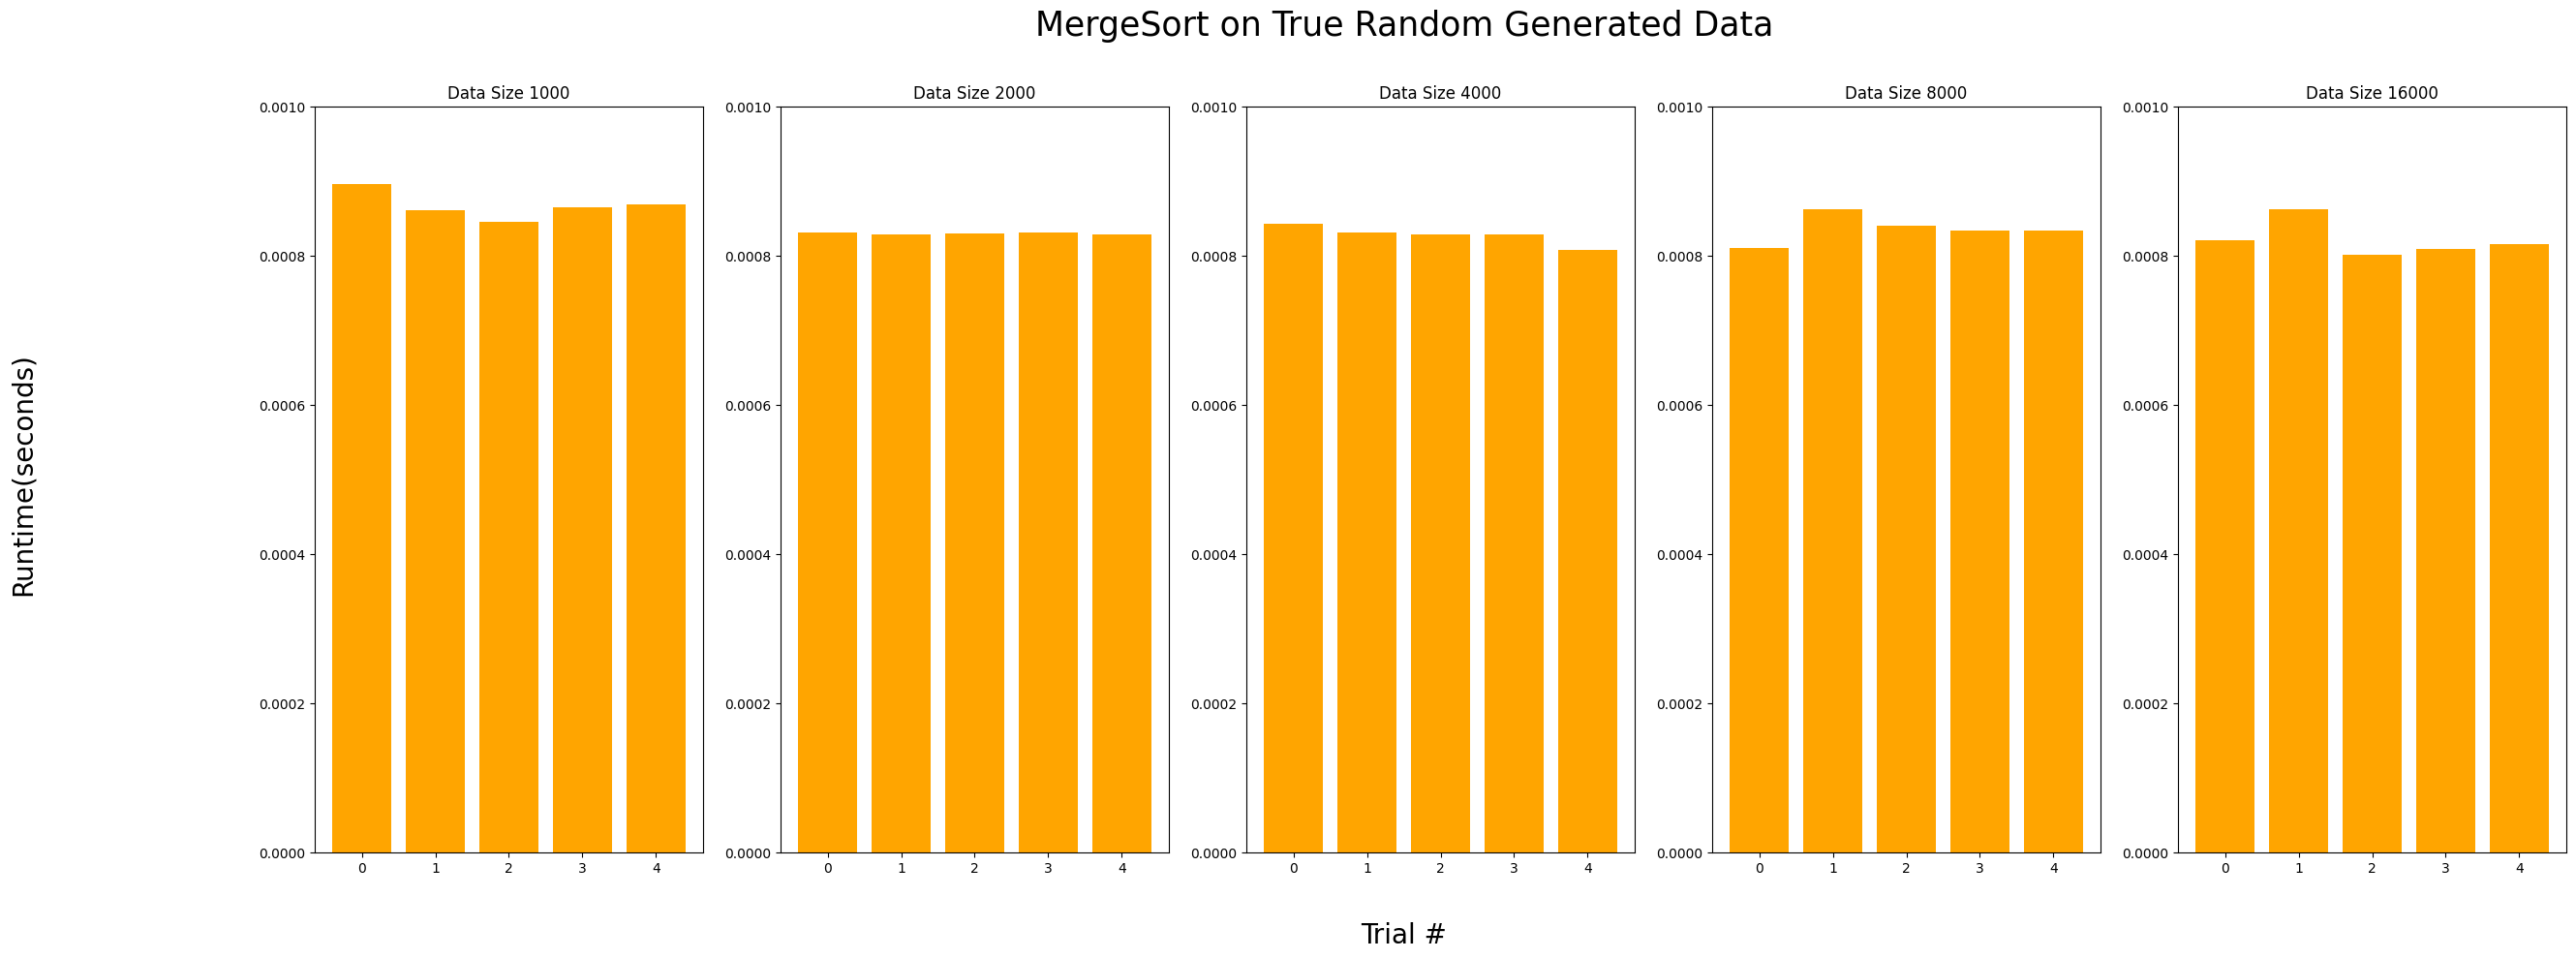

In [89]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))

axs[0].bar(range(len(merge_tr_1000)), merge_tr_1000['Runtime'], color="orange")
axs[0].set_title('Data Size 1000')
axs[0].set_ylim(0, 0.001)

axs[1].bar(range(len(merge_tr_2000)), merge_tr_2000['Runtime'], color="orange")
axs[1].set_title('Data Size 2000')
axs[1].set_ylim(0, 0.001)

axs[2].bar(range(len(merge_tr_4000)), merge_tr_4000['Runtime'], color="orange")
axs[2].set_title('Data Size 4000')
axs[2].set_ylim(0, 0.001)

axs[3].bar(range(len(merge_tr_8000)), merge_tr_8000['Runtime'], color="orange")
axs[3].set_title('Data Size 8000')
axs[3].set_ylim(0, 0.001)

axs[4].bar(range(len(merge_tr_16000)), merge_tr_16000['Runtime'], color="orange")
axs[4].set_title('Data Size 16000')
axs[4].set_ylim(0, 0.001)


fig.supxlabel("Trial #", fontsize=20)
fig.supylabel("Runtime(seconds)", fontsize=20)
fig.suptitle("MergeSort on True Random Generated Data", fontsize=25)

plt.show()

### QuickSort Time Analysis

In [83]:
quick_tr_1000 = tr_df[(tr_df['Algorithm'] == 'QuickSort') & (tr_df['Data Size'] == 1000)]
quick_tr_2000 = tr_df[(tr_df['Algorithm'] == 'QuickSort') & (tr_df['Data Size'] == 2000)]
quick_tr_4000 = tr_df[(tr_df['Algorithm'] == 'QuickSort') & (tr_df['Data Size'] == 4000)]
quick_tr_8000 = tr_df[(tr_df['Algorithm'] == 'QuickSort') & (tr_df['Data Size'] == 8000)]
quick_tr_16000 = tr_df[(tr_df['Algorithm'] == 'QuickSort') & (tr_df['Data Size'] == 16000)]

#quick_as_1000 = as_df[(as_df['Algorithm'] == 'QuickSort') & (as_df['Data Size'] == 1000)]
#quick_as_2000 = as_df[(as_df['Algorithm'] == 'QuickSort') & (as_df['Data Size'] == 2000)]
#quick_as_4000 = as_df[(as_df['Algorithm'] == 'QuickSort') & (as_df['Data Size'] == 4000)]
#quick_as_8000 = as_df[(as_df['Algorithm'] == 'QuickSort') & (as_df['Data Size'] == 8000)]
#quick_as_16000 = as_df[(as_df['Algorithm'] == 'QuickSort') & (as_df['Data Size'] == 16000)]

#### Plotting QuickSort: True Random vs. Almost Sorted

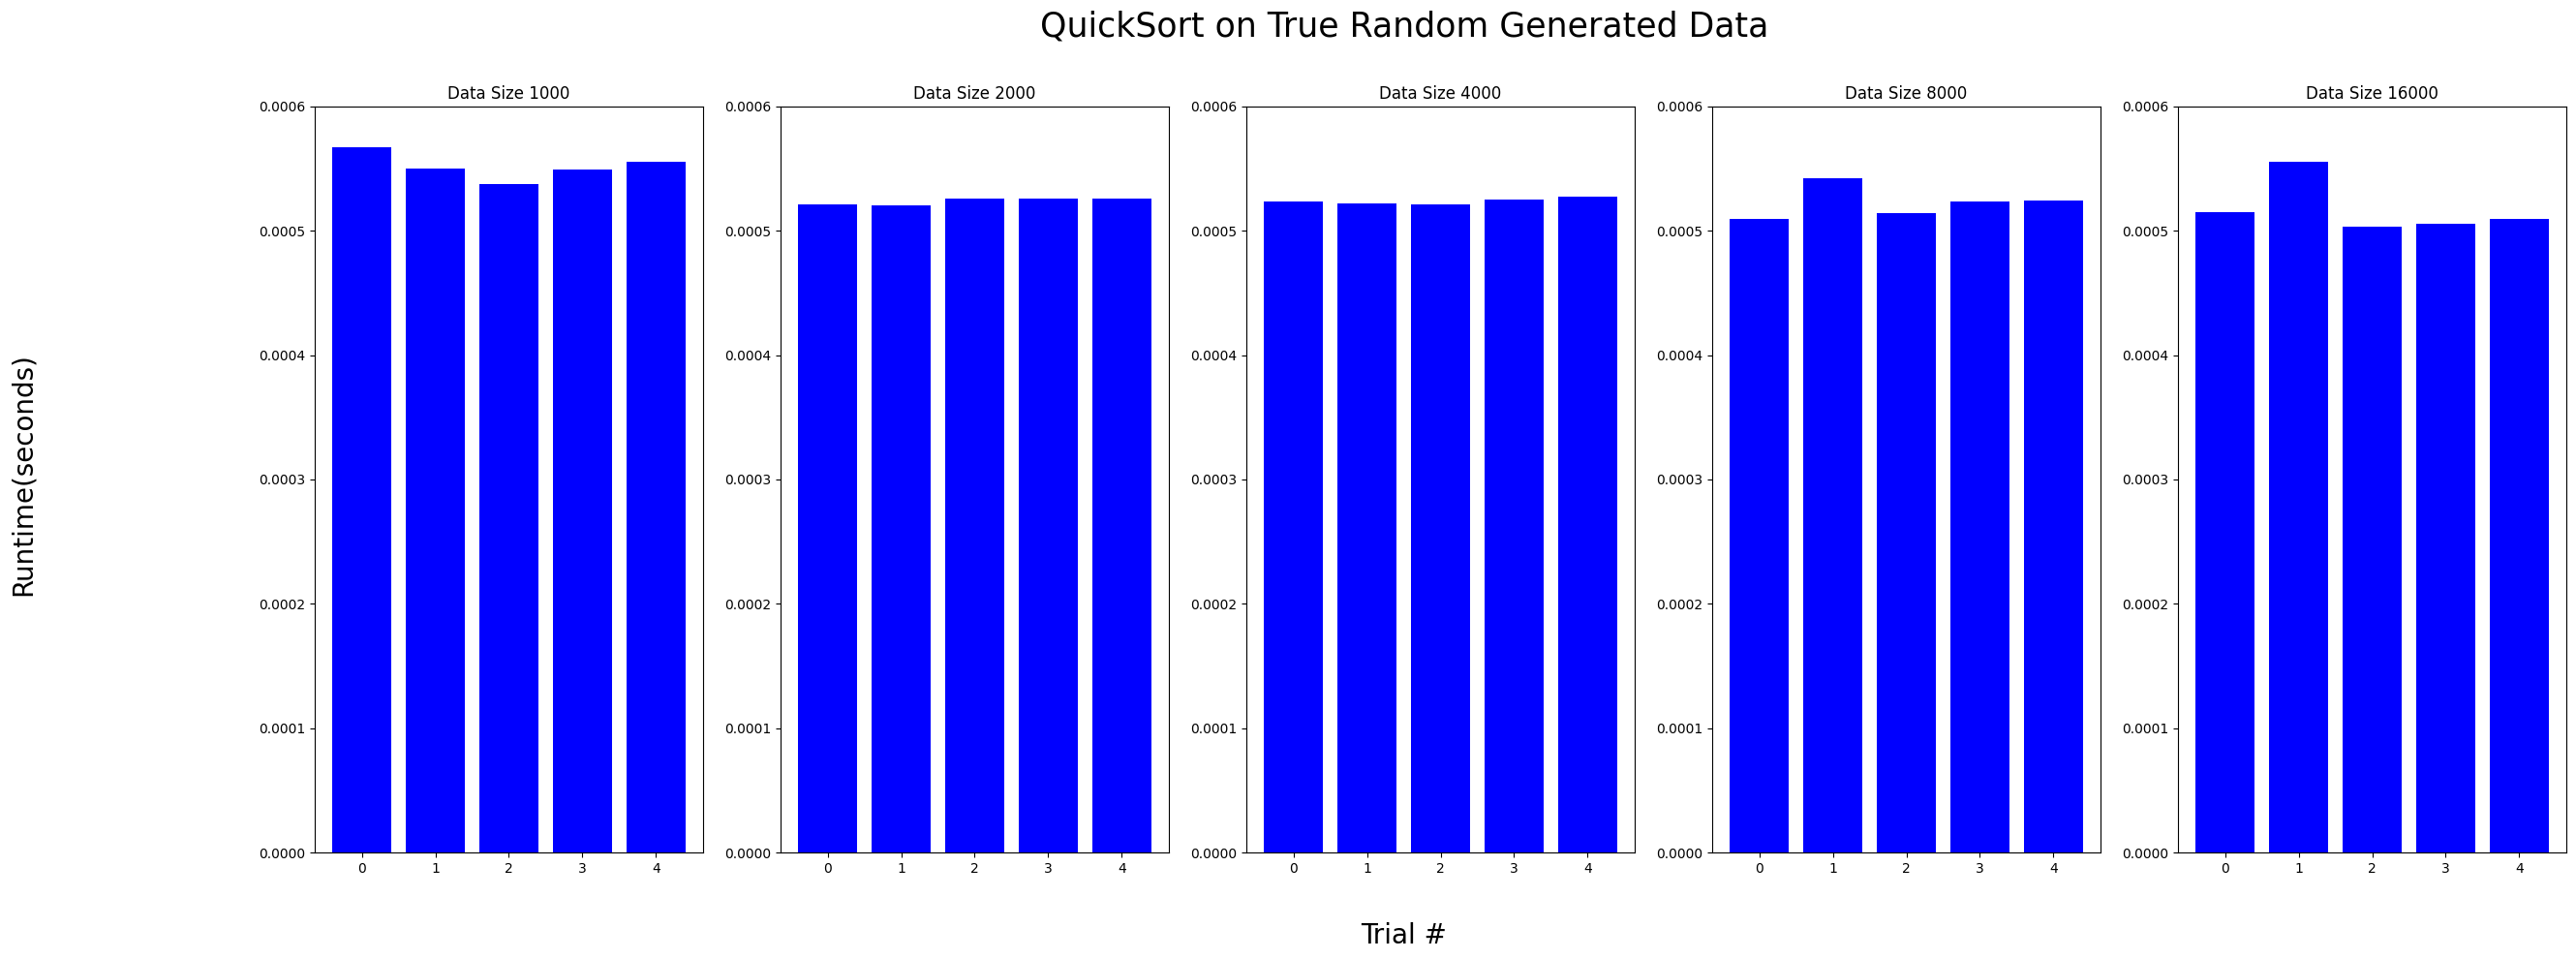

In [88]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))

axs[0].bar(range(len(quick_tr_1000)), quick_tr_1000['Runtime'], color="blue")
axs[0].set_title('Data Size 1000')
axs[0].set_ylim(0, 0.0006)

axs[1].bar(range(len(quick_tr_2000)), quick_tr_2000['Runtime'], color="blue")
axs[1].set_title('Data Size 2000')
axs[1].set_ylim(0, 0.0006)

axs[2].bar(range(len(quick_tr_4000)), quick_tr_4000['Runtime'], color="blue")
axs[2].set_title('Data Size 4000')
axs[2].set_ylim(0, 0.0006)

axs[3].bar(range(len(quick_tr_8000)), quick_tr_8000['Runtime'], color="blue")
axs[3].set_title('Data Size 8000')
axs[3].set_ylim(0, 0.0006)

axs[4].bar(range(len(quick_tr_16000)), quick_tr_16000['Runtime'], color="blue")
axs[4].set_title('Data Size 16000')
axs[4].set_ylim(0, 0.0006)


fig.supxlabel("Trial #", fontsize=20)
fig.supylabel("Runtime(seconds)", fontsize=20)
fig.suptitle("QuickSort on True Random Generated Data", fontsize=25)

plt.show()

### InsertionSort Time Analysis

In [95]:
insertion_tr_1000 = tr_df[(tr_df['Algorithm'] == 'InsertionSort') & (tr_df['Data Size'] == 1000)]
insertion_tr_2000 = tr_df[(tr_df['Algorithm'] == 'InsertionSort') & (tr_df['Data Size'] == 2000)]
insertion_tr_4000 = tr_df[(tr_df['Algorithm'] == 'InsertionSort') & (tr_df['Data Size'] == 4000)]
insertion_tr_8000 = tr_df[(tr_df['Algorithm'] == 'InsertionSort') & (tr_df['Data Size'] == 8000)]
insertion_tr_16000 = tr_df[(tr_df['Algorithm'] == 'InsertionSort') & (tr_df['Data Size'] == 16000)]

#insertion_as_1000 = as_df[(as_df['Algorithm'] == 'InsertionSort') & (as_df['Data Size'] == 1000)]
#insertion_as_2000 = as_df[(as_df['Algorithm'] == 'InsertionSort') & (as_df['Data Size'] == 2000)]
#insertion_as_4000 = as_df[(as_df['Algorithm'] == 'InsertionSort') & (as_df['Data Size'] == 4000)]
#insertion_as_8000 = as_df[(as_df['Algorithm'] == 'InsertionSort') & (as_df['Data Size'] == 8000)]
#insertion_as_16000 = as_df[(as_df['Algorithm'] == 'InsertionSort') & (as_df['Data Size'] == 16000)]

         Algorithm  Data Size   Runtime  Theoretical Big-O
122  InsertionSort       8000  0.004638                  0
130  InsertionSort       8000  0.004551                  0
138  InsertionSort       8000  0.004626                  0
146  InsertionSort       8000  0.004617                  0
154  InsertionSort       8000  0.004607                  0


#### Plotting InsertionSort: True Random vs. Almost Sorted

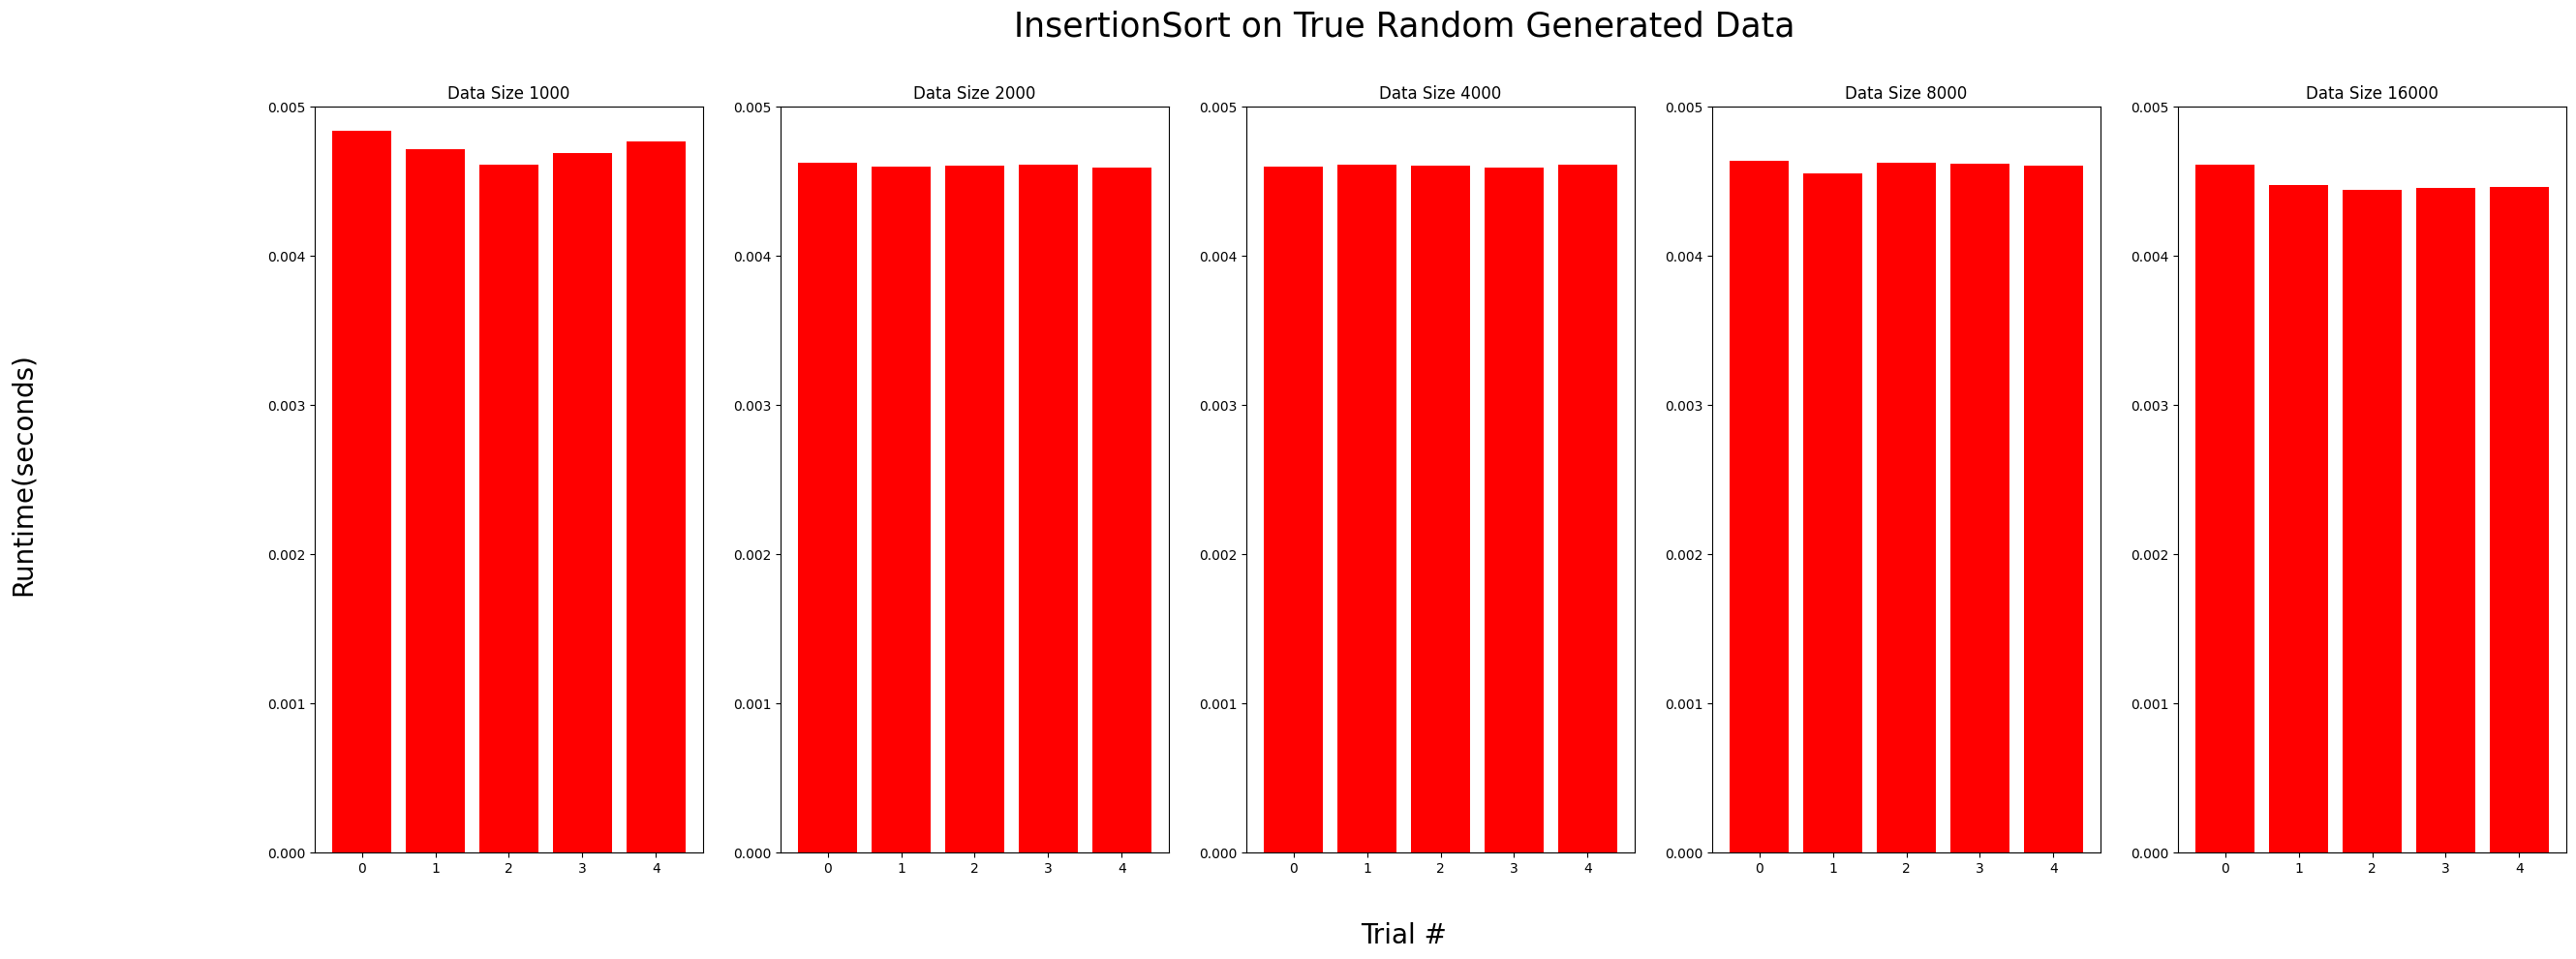

In [96]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))

axs[0].bar(range(len(insertion_tr_1000)), insertion_tr_1000['Runtime'], color="red")
axs[0].set_title('Data Size 1000')
axs[0].set_ylim(0, 0.005)

axs[1].bar(range(len(insertion_tr_2000)), insertion_tr_2000['Runtime'], color="red")
axs[1].set_title('Data Size 2000')
axs[1].set_ylim(0, 0.005)

axs[2].bar(range(len(insertion_tr_4000)), insertion_tr_4000['Runtime'], color="red")
axs[2].set_title('Data Size 4000')
axs[2].set_ylim(0, 0.005)

axs[3].bar(range(len(insertion_tr_8000)), insertion_tr_8000['Runtime'], color="red")
axs[3].set_title('Data Size 8000')
axs[3].set_ylim(0, 0.005)

axs[4].bar(range(len(insertion_tr_16000)), insertion_tr_16000['Runtime'], color="red")
axs[4].set_title('Data Size 16000')
axs[4].set_ylim(0, 0.005)


fig.supxlabel("Trial #", fontsize=20)
fig.supylabel("Runtime(seconds)", fontsize=20)
fig.suptitle("InsertionSort on True Random Generated Data", fontsize=25)

plt.show()

### ShellSort Time Analysis

In [ ]:
# there are two shell sorts being called "1" and "2" --> decide hwo to do this
shell_tr_1000 = tr_df[(tr_df['Algorithm'] == 'ShellSort') & (tr_df['Data Size'] == 1000)]
shell_tr_2000 = tr_df[(tr_df['Algorithm'] == 'ShellSort') & (tr_df['Data Size'] == 2000)]
shell_tr_4000 = tr_df[(tr_df['Algorithm'] == 'ShellSort') & (tr_df['Data Size'] == 4000)]
shell_tr_8000 = tr_df[(tr_df['Algorithm'] == 'ShellSort') & (tr_df['Data Size'] == 8000)]
shell_tr_16000 = tr_df[(tr_df['Algorithm'] == 'ShellSort') & (tr_df['Data Size'] == 16000)]

shell_as_1000 = as_df[(as_df['Algorithm'] == 'ShellSort') & (as_df['Data Size'] == 1000)]
shell_as_2000 = as_df[(as_df['Algorithm'] == 'ShellSort') & (as_df['Data Size'] == 2000)]
shell_as_4000 = as_df[(as_df['Algorithm'] == 'ShellSort') & (as_df['Data Size'] == 4000)]
shell_as_8000 = as_df[(as_df['Algorithm'] == 'ShellSort') & (as_df['Data Size'] == 8000)]
shell_as_16000 = as_df[(as_df['Algorithm'] == 'ShellSort') & (as_df['Data Size'] == 16000)]

### BucketSort Time Analysis

In [ ]:
bucket_tr_1000 = tr_df[(tr_df['Algorithm'] == 'BucketSort') & (tr_df['Data Size'] == 1000)]
bucket_tr_2000 = tr_df[(tr_df['Algorithm'] == 'BucketSort') & (tr_df['Data Size'] == 2000)]
bucket_tr_4000 = tr_df[(tr_df['Algorithm'] == 'BucketSort') & (tr_df['Data Size'] == 4000)]
bucket_tr_8000 = tr_df[(tr_df['Algorithm'] == 'BucketSort') & (tr_df['Data Size'] == 8000)]
bucket_tr_16000 = tr_df[(tr_df['Algorithm'] == 'BucketSort') & (tr_df['Data Size'] == 16000)]

bucket_as_1000 = as_df[(as_df['Algorithm'] == 'BucketSort') & (as_df['Data Size'] == 1000)]
bucket_as_2000 = as_df[(as_df['Algorithm'] == 'BucketSort') & (as_df['Data Size'] == 2000)]
bucket_as_4000 = as_df[(as_df['Algorithm'] == 'BucketSort') & (as_df['Data Size'] == 4000)]
bucket_as_8000 = as_df[(as_df['Algorithm'] == 'BucketSort') & (as_df['Data Size'] == 8000)]
bucket_as_16000 = as_df[(as_df['Algorithm'] == 'BucketSort') & (as_df['Data Size'] == 16000)]

### RadixSort Time Analysis

In [ ]:
radix_tr_1000 = tr_df[(tr_df['Algorithm'] == 'RadixSort') & (tr_df['Data Size'] == 1000)]
radix_tr_2000 = tr_df[(tr_df['Algorithm'] == 'RadixSort') & (tr_df['Data Size'] == 2000)]
radix_tr_4000 = tr_df[(tr_df['Algorithm'] == 'RadixSort') & (tr_df['Data Size'] == 4000)]
radix_tr_8000 = tr_df[(tr_df['Algorithm'] == 'RadixSort') & (tr_df['Data Size'] == 8000)]
radix_tr_16000 = tr_df[(tr_df['Algorithm'] == 'RadixSort') & (tr_df['Data Size'] == 16000)]

radix_as_1000 = as_df[(as_df['Algorithm'] == 'RadixSort') & (as_df['Data Size'] == 1000)]
radix_as_2000 = as_df[(as_df['Algorithm'] == 'RadixSort') & (as_df['Data Size'] == 2000)]
radix_as_4000 = as_df[(as_df['Algorithm'] == 'RadixSort') & (as_df['Data Size'] == 4000)]
radix_as_8000 = as_df[(as_df['Algorithm'] == 'RadixSort') & (as_df['Data Size'] == 8000)]
radix_as_16000 = as_df[(as_df['Algorithm'] == 'RadixSort') & (as_df['Data Size'] == 16000)]

### BinaryInsertionSort Time Analysis

In [ ]:
bis_tr_1000 = tr_df[(tr_df['Algorithm'] == 'BinaryInsertionSort') & (tr_df['Data Size'] == 1000)]
bis_tr_2000 = tr_df[(tr_df['Algorithm'] == 'BinaryInsertionSort') & (tr_df['Data Size'] == 2000)]
bis_tr_4000 = tr_df[(tr_df['Algorithm'] == 'BinaryInsertionSort') & (tr_df['Data Size'] == 4000)]
bis_tr_8000 = tr_df[(tr_df['Algorithm'] == 'BinaryInsertionSort') & (tr_df['Data Size'] == 8000)]
bis_tr_16000 = tr_df[(tr_df['Algorithm'] == 'BinaryInsertionSort') & (tr_df['Data Size'] == 16000)]

bis_as_1000 = as_df[(as_df['Algorithm'] == 'BinaryInsertionSort') & (as_df['Data Size'] == 1000)]
bis_as_2000 = as_df[(as_df['Algorithm'] == 'BinaryInsertionSort') & (as_df['Data Size'] == 2000)]
bis_as_4000 = as_df[(as_df['Algorithm'] == 'BinaryInsertionSort') & (as_df['Data Size'] == 4000)]
bis_as_8000 = as_df[(as_df['Algorithm'] == 'BinaryInsertionSort') & (as_df['Data Size'] == 8000)]
bis_as_16000 = as_df[(as_df['Algorithm'] == 'BinaryInsertionSort') & (as_df['Data Size'] == 16000)]

### Peyton's Custom Algorithm

## **Comparative Time Analysis**